# 06 Spotify Data Regression Analysis

## The goal of this regression is to look at how total tracks played relates to the total minutes played  

## 01 Importing Libraries and Data 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
import os 

In [2]:
%matplotlib inline 

In [3]:
path = '/Users/brookecoffey/Desktop/DataAnalyticsTy/Achievement 6 /Spotify Project'

In [4]:
df = pd.read_pickle(os.path.join(path, '01 Data', '02 Prepared Data', 'df_6.pkl'))

## 02 Data Cleaning 
### Remove Podcast Data  

In [5]:
df.shape

(172116, 28)

In [6]:
df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped_x', 'offline', 'latitude',
       'longitude', 'region', 'minutes_seconds', 'year', 'month',
       'day_of_week', 'hour_of_day', 'skipped_ratio', 'skip_prob', 'count_y',
       'listening_frequency'],
      dtype='object')

In [7]:
df['listening_frequency'].value_counts()

Above Average Frequency    42591
Highest Frequency          42246
Medium Frequency           41344
Low Frequency              30095
Only Played Once           13206
NaN                         2634
Name: listening_frequency, dtype: int64

In [8]:
df = df[df['listening_frequency'] != 'NaN']

In [9]:
df['listening_frequency'].value_counts()

Above Average Frequency    42591
Highest Frequency          42246
Medium Frequency           41344
Low Frequency              30095
Only Played Once           13206
Name: listening_frequency, dtype: int64

In [10]:
df.shape

(169482, 28)

In [11]:
# Effectively removed podcast episodes

In [12]:
# Import datetime to manipulate timestamp data into weekly aggregates
import datetime

In [13]:
# Grouping total track and time played data into weekly format 

In [14]:
# Group by week and count the total number of tracks played in each week
tracks_played = df.groupby(pd.Grouper(key='ts', freq='W')).size()

# Group by week and sum the milliseconds played in each week
ms_played = df.groupby(pd.Grouper(key='ts', freq='W'))['ms_played'].sum()

# Concatenate the two Series into a single DataFrame
result_df = pd.concat([tracks_played, ms_played], axis=1)
result_df.columns = ['Total Tracks Played', 'Total Milliseconds Played']

# Display the aggregated data with week
print(result_df)

            Total Tracks Played  Total Milliseconds Played
ts                                                        
2012-07-22                  289                    4888728
2012-07-29                    6                      19594
2012-08-05                   21                    2211644
2012-08-12                    4                     335259
2012-08-19                   65                    5859256
...                         ...                        ...
2023-07-30                  579                   49525838
2023-08-06                  265                   65626116
2023-08-13                  367                   61990298
2023-08-20                  592                   82483378
2023-08-27                  545                   42746412

[580 rows x 2 columns]


In [15]:
# turning milliseconds into minutes for easier scaling 
result_df['minutes_played'] = result_df['Total Milliseconds Played'] / 60000

In [16]:
result_df

,Total Tracks Played,Total Milliseconds Played,minutes_played
ts,,,
2012-07-22,289,4888728,81.478800
2012-07-29,6,19594,0.326567
2012-08-05,21,2211644,36.860733
2012-08-12,4,335259,5.587650
2012-08-19,65,5859256,97.654267
...,...,...,...
2023-07-30,579,49525838,825.430633
2023-08-06,265,65626116,1093.768600
2023-08-13,367,61990298,1033.171633


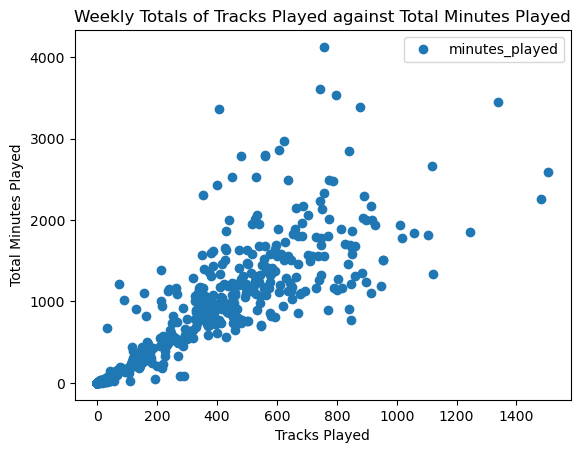

In [17]:
# Plotting relationship
result_df.plot(x = 'Total Tracks Played', y = 'minutes_played', style='o')
plt.title('Weekly Totals of Tracks Played against Total Minutes Played')
plt.xlabel('Tracks Played')
plt.ylabel('Total Minutes Played')
plt.show()

In [18]:
result_df.describe()

,Total Tracks Played,Total Milliseconds Played,minutes_played
count,580.000000,5.800000e+02,580.000000
mean,292.210345,4.260489e+07,710.081449
std,301.471298,4.631229e+07,771.871459
min,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000
50%,236.000000,3.312598e+07,552.099717
75%,500.000000,7.093780e+07,1182.296713
max,1506.000000,2.475926e+08,4126.543883


### Missing Values

In [19]:
result_df.isnull().sum()

# No missing values

Total Tracks Played          0
Total Milliseconds Played    0
minutes_played               0
dtype: int64

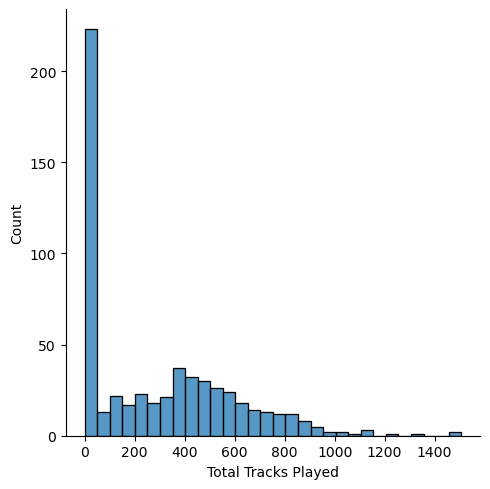

In [20]:
sns.displot(result_df['Total Tracks Played'], bins=30)

In [21]:
# Despite the extreme frequency of low-duration plays, I think I 
# need to leave this unchanged for now and can revisit after the initial regression

## Duplicates Check 

In [22]:
dups = result_df.duplicated()

In [23]:
dups.shape # No duplicates 

(580,)

## 03 Data Prep for regression analysis

In [24]:
# Create a scatterplot to plot variables against each other 

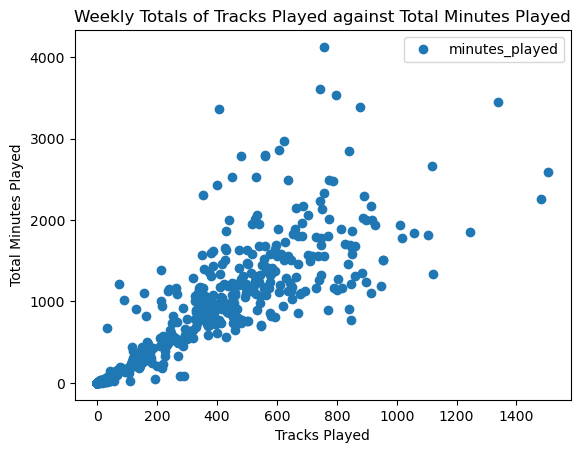

In [25]:
result_df.plot(x = 'Total Tracks Played', y = 'minutes_played', style='o')
plt.title('Weekly Totals of Tracks Played against Total Minutes Played')
plt.xlabel('Tracks Played')
plt.ylabel('Total Minutes Played')
plt.show()

# Hypothesis: As the total tracks played increases, so will the total minutes played 

In [26]:
# Reshape variables into Numpy arrays 
X = result_df['Total Tracks Played'].values.reshape(-1,1)
y = result_df['minutes_played'].values.reshape(-1,1)

In [27]:
X

array([[ 289],
       [   6],
       [  21],
       [   4],
       [  65],
       [ 285],
       [   6],
       [  44],
       [  32],
       [   4],
       [  64],
       [ 120],
       [   2],
       [ 135],
       [  65],
       [ 237],
       [ 483],
       [ 143],
       [ 111],
       [ 221],
       [ 152],
       [ 385],
       [ 233],
       [ 268],
       [ 158],
       [ 138],
       [ 153],
       [ 181],
       [ 119],
       [ 257],
       [ 111],
       [ 125],
       [ 119],
       [ 106],
       [  50],
       [ 105],
       [ 216],
       [  85],
       [ 132],
       [  19],
       [  40],
       [   0],
       [   0],
       [   0],
       [   0],
       [  15],
       [   1],
       [  26],
       [  29],
       [   7],
       [   2],
       [  13],
       [   0],
       [   8],
       [  93],
       [   5],
       [ 133],
       [  30],
       [   6],
       [  22],
       [ 187],
       [ 199],
       [ 218],
       [  22],
       [  37],
       [ 107],
       [  

In [28]:
y

array([[8.14788000e+01],
       [3.26566667e-01],
       [3.68607333e+01],
       [5.58765000e+00],
       [9.76542667e+01],
       [4.55191383e+02],
       [2.03300167e+01],
       [6.18226000e+01],
       [6.74882500e+01],
       [8.17926667e+00],
       [1.40495617e+02],
       [3.02073617e+02],
       [3.58321667e+00],
       [2.78659700e+02],
       [1.08106200e+02],
       [5.44561133e+02],
       [7.68808417e+02],
       [2.04094900e+02],
       [2.28198483e+02],
       [5.52702867e+02],
       [3.85492967e+02],
       [9.73736483e+02],
       [5.29651317e+02],
       [3.24763150e+02],
       [3.84264900e+02],
       [1.83900817e+02],
       [2.53987183e+02],
       [2.40880033e+02],
       [2.12198767e+02],
       [5.26328700e+02],
       [2.32646467e+02],
       [2.13386583e+02],
       [2.56483583e+02],
       [1.92366633e+02],
       [1.21735967e+02],
       [1.53545200e+02],
       [1.86657317e+02],
       [1.48920233e+02],
       [2.42196450e+02],
       [3.35948500e+01],


In [29]:
# Split data into a training set and a test set 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

# 04 Regression Analysis 

In [30]:
# Create a regression object. 
regression = LinearRegression()

In [31]:
# Fit the regression object onto the training set 
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

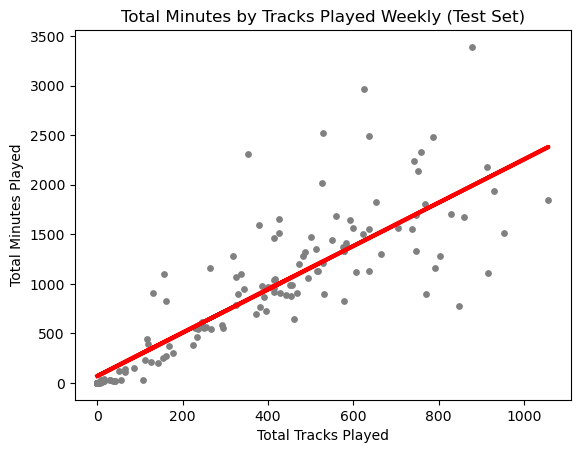

In [33]:
# Create a plot that shows the regression line from the model 

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s=15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=3)
plot_test.title('Total Minutes by Tracks Played Weekly (Test Set)')
plot_test.xlabel('Total Tracks Played')
plot_test.ylabel('Total Minutes Played')
plot_test.show()

# The line appears to fit the set very well, there are a few outliers on either end, but it generally fits the trend well with large clusters of points around the trend line

# 05 Test Set Summary Statistics

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:' , r2)

Slope: [[2.18527781]]
Mean squared error: 122617.8371226921
R2 score: 0.7809864358138345


In [36]:
y_predicted

array([[1223.68874288],
       [1000.79040661],
       [ 150.71733984],
       [1394.1404118 ],
       [ 981.12290635],
       [1232.42985411],
       [  69.86206099],
       [ 780.07734814],
       [  91.71483906],
       [1092.57207449],
       [  69.86206099],
       [  69.86206099],
       [1754.71124989],
       [  69.86206099],
       [ 627.10790168],
       [ 972.38179512],
       [ 922.12040557],
       [1459.698746  ],
       [ 133.23511739],
       [ 911.19401654],
       [  69.86206099],
       [1057.60762958],
       [1328.5820776 ],
       [ 946.15846144],
       [1066.34874081],
       [  69.86206099],
       [ 179.12595133],
       [ 900.26762751],
       [1365.73180031],
       [ 410.76539883],
       [  69.86206099],
       [  69.86206099],
       [ 976.75235074],
       [ 561.54956748],
       [ 974.56707293],
       [1433.47541232],
       [  69.86206099],
       [1190.90957578],
       [ 192.23761816],
       [1002.97568442],
       [  87.34428345],
       [ 904.638

In [37]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1210.911733,1223.688743
1,1508.672983,1000.790407
2,24.014617,150.717340
3,1119.574033,1394.140412
4,1043.645817,981.122906
5,897.638817,1232.429854
6,0.000000,69.862061
7,1065.389200,780.077348
8,32.971033,91.714839
9,907.355533,1092.572074


## Looking at the dataframe above comparing actual values against predicted values, it seems that there are wider variances than expected, but some were also very close considering the scale of the data 

In [38]:
#exporting data 
result_df.to_pickle(os.path.join(path, '01 Data', '02 Prepared Data', 'regression.pkl'))

In [39]:
result_df.to_csv((os.path.join(path, '01 Data', '02 Prepared Data', 'regression.csv')))

In [40]:
df.to_pickle((os.path.join(path, '01 Data', '02 Prepared Data', 'no_podcasts.pkl')))